In [175]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [176]:
#load dataset method
def loadData(file_path):
    df = pd.read_csv(file_path)
    return df
# data cleaning method
def cleaningData(df, drop_columns=None):
    # Check for duplicate records
    duplicate = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate}")

    if duplicate > 0:
        df = df.drop_duplicates()
        print("Duplicate rows have been dropped.")
    
    if drop_columns:
        df = df.drop(columns=drop_columns)
        print(f"Dropped columns: {drop_columns}")

    return df

# File path for the dataset
filePath = r'C:\Users\DS\Downloads\heart_disease_uci.csv'

# Load, clean, handle missing values, and perform EDA
df = loadData(filePath)
drop_columns_df = ['id']
df = cleaningData(df, drop_columns=drop_columns_df)


df.tail(10)

Number of duplicate rows: 0
Dropped columns: ['id']


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
910,51,Female,VA Long Beach,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,NaN,NaN,0
911,62,Male,VA Long Beach,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,True,3.0,flat,NaN,NaN,4
912,53,Male,VA Long Beach,asymptomatic,144.0,300.0,True,st-t abnormality,128.0,True,1.5,flat,NaN,NaN,3
913,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN,1
914,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,NaN,NaN,normal,2
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [177]:

#check missing values 
print("Missing values before cleaning:")
print(df.isnull().sum())

def handleMissingValues(df, strategy='mean', columns=None):
    if df.isnull().values.any():
        if strategy == 'mean':
            numeric_cols = df.select_dtypes(include='number').columns
            df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
        
        elif strategy == 'mode':
            if columns is None:
                categorical_cols = df.select_dtypes(include='object').columns
            else:
                categorical_cols = columns
            for col in categorical_cols:
                mode_value = df[col].mode()[0]
                df[col] = df[col].fillna(mode_value)
            # Use infer_objects to ensure proper dtype inference
            df[categorical_cols] = df[categorical_cols].infer_objects(copy=False)
        
        print("Handled missing values using strategy: ", strategy)
    else:
        print("No missing values found.")

    return df

# Handle missing values
df = handleMissingValues(df, strategy='mean')
df = handleMissingValues(df, strategy='mode', columns=['fbs', 'exang', 'slope', 'thal'])

# Verify that missing values have been handled
print("\nMissing values after cleaning:")
print(df.isnull().sum())



Missing values before cleaning:
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
Handled missing values using strategy:  mean
Handled missing values using strategy:  mode

Missing values after cleaning:
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     2
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


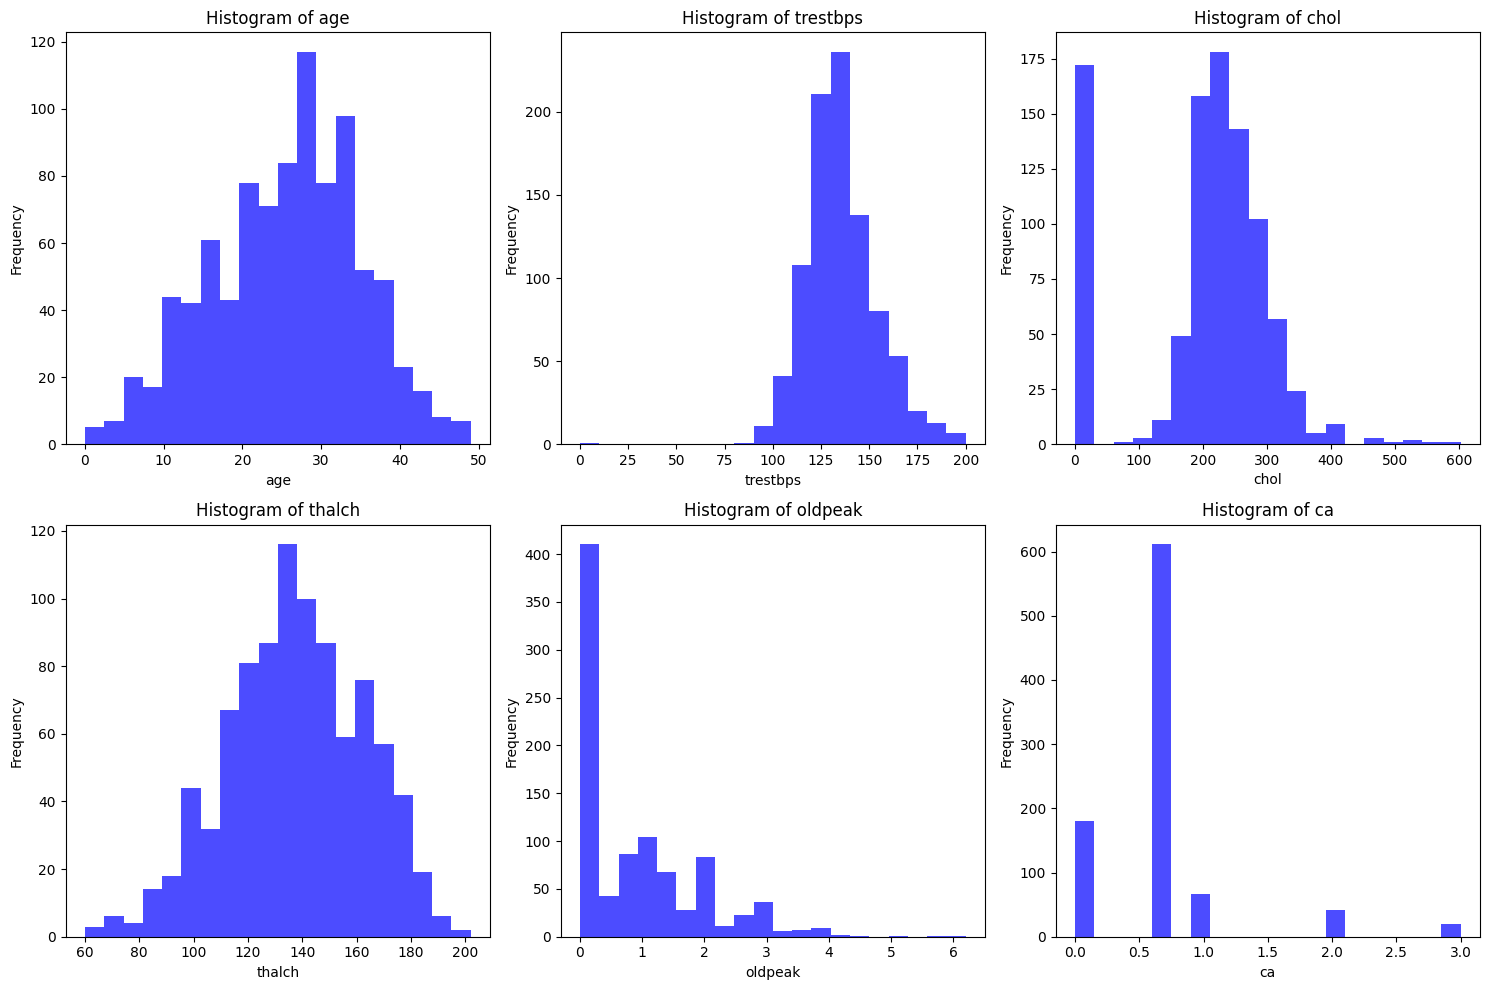

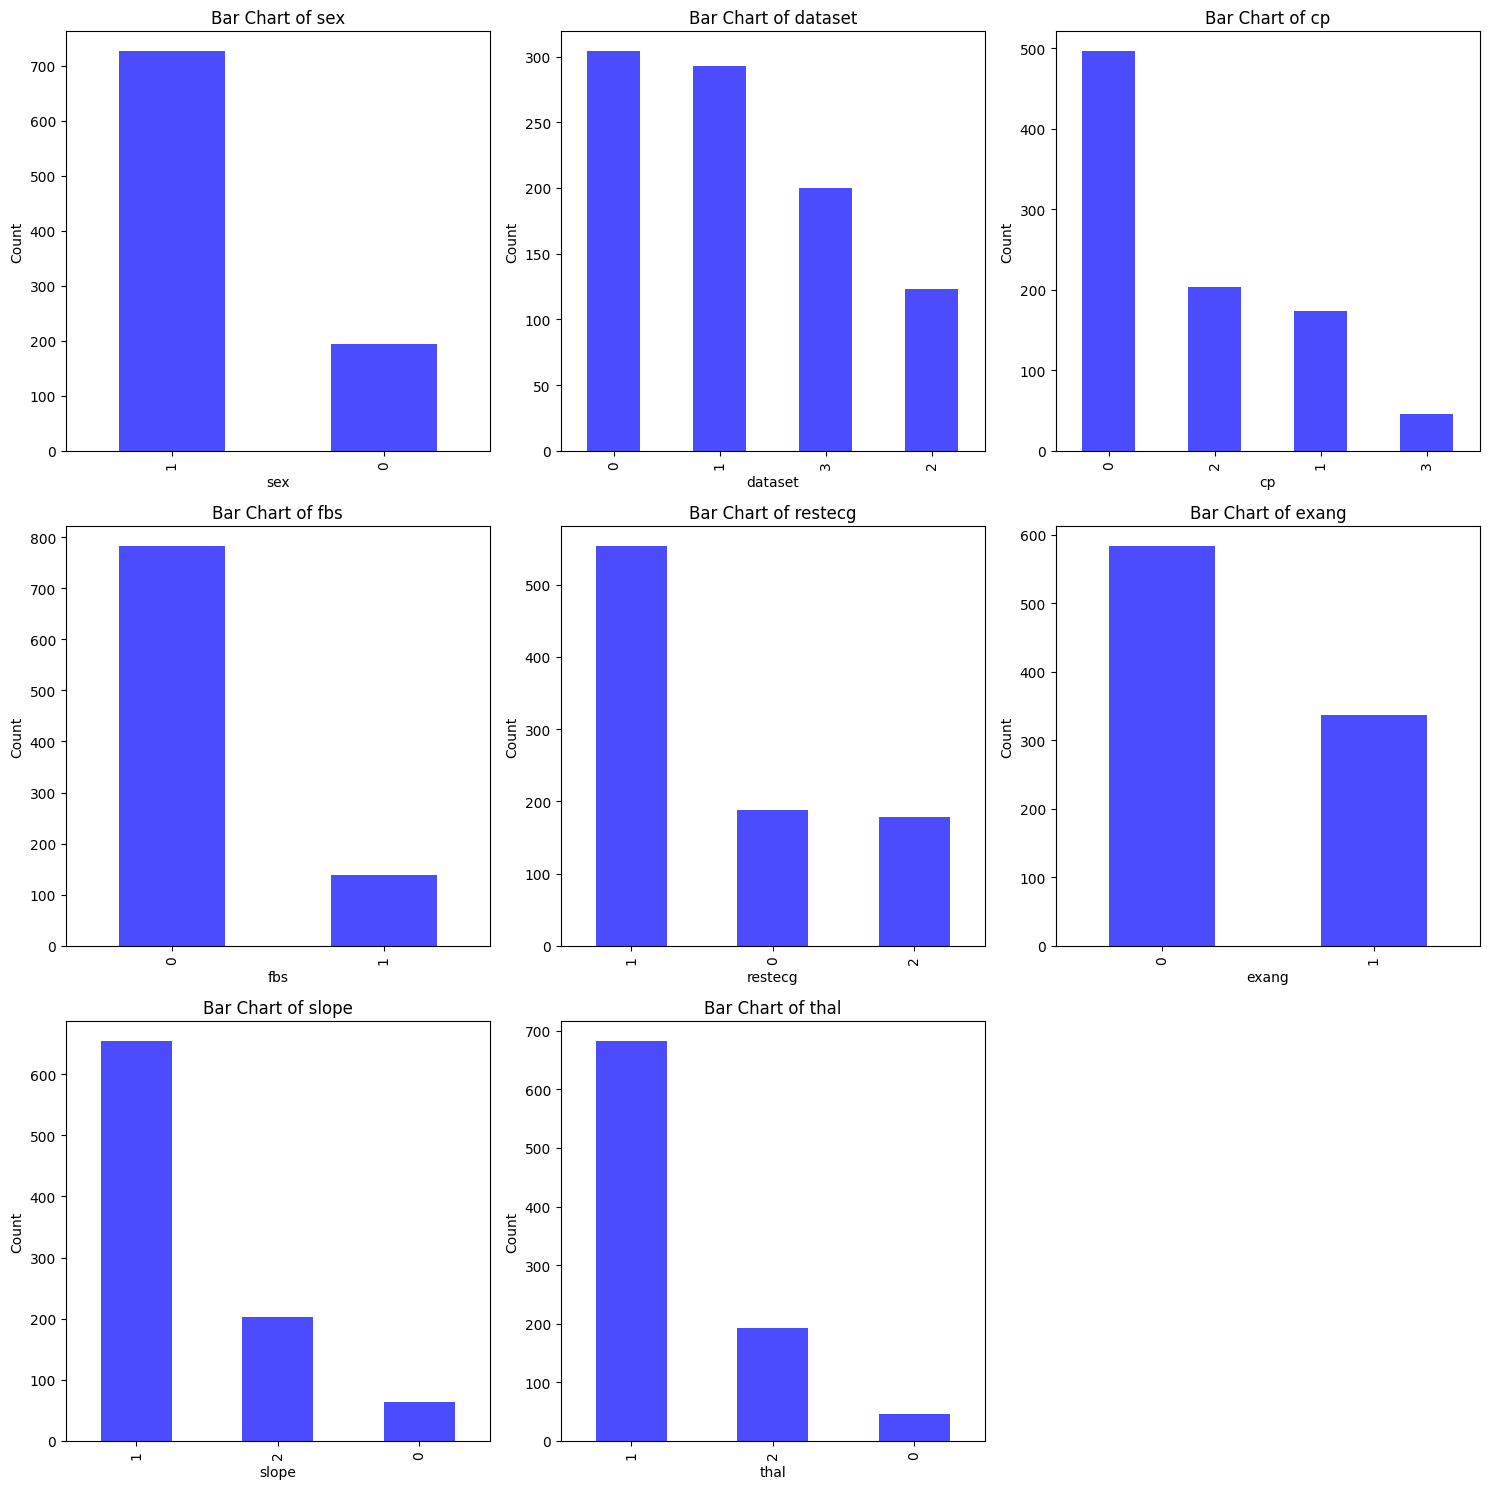

Descriptive Statistics:
              age    trestbps        chol      thalch     oldpeak          ca  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375   
std      9.424685   18.443895  108.957634   25.138494    1.053774    0.541667   
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000   
25%     47.000000  120.000000  177.750000  120.000000    0.000000    0.676375   
50%     54.000000  130.000000  221.000000  138.000000    0.800000    0.676375   
75%     60.000000  140.000000  267.000000  156.000000    1.500000    0.676375   
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000   

              num  
count  920.000000  
mean     0.995652  
std      1.142693  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      4.000000  


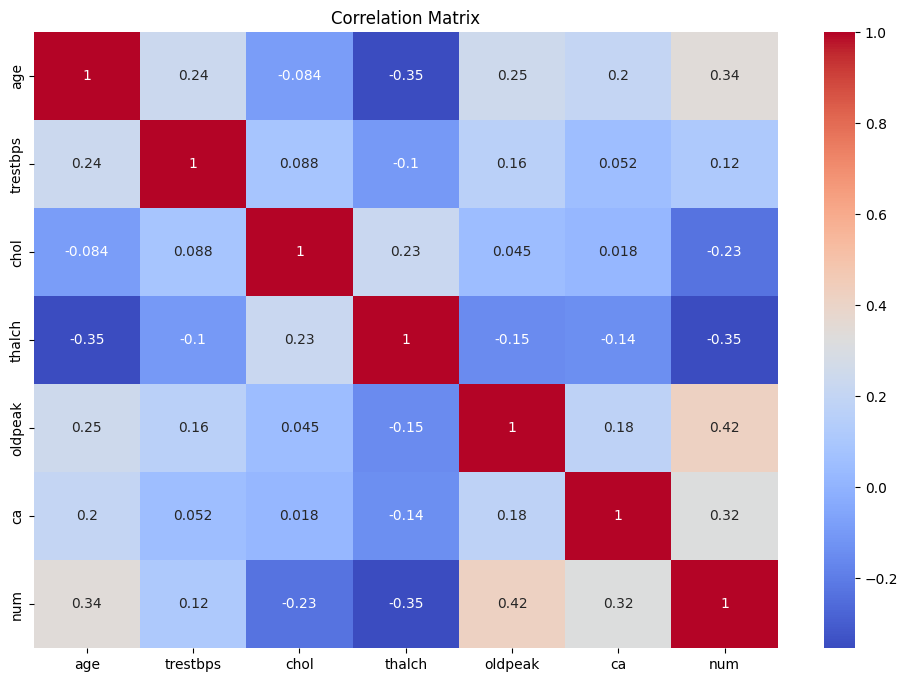

In [180]:
# Visualization
## Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Fixed 2x3 grid
    plt.hist(data[feature], bins=20, alpha=0.7, color='b')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

## Plot bar charts for categorical features
plt.figure(figsize=(15, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)  # Fixed 3x3 grid
    data[feature].value_counts().plot(kind='bar', alpha=0.7, color='b', ax=plt.gca())
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

print("Descriptive Statistics:")
print(df.describe())

if df.select_dtypes(include='number').shape[1] > 1:
        corr_matrix = df.select_dtypes(include='number').corr()
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()


Outliers detected in chol.

outlier handled  0      233.000000
1      286.000000
2      229.000000
3      250.000000
4      204.000000
          ...    
915    333.000000
916    139.000000
917    223.000000
918    232.492416
919    254.000000
Name: chol, Length: 920, dtype: float64


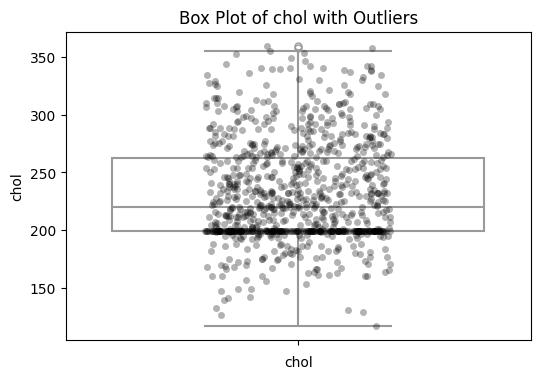

In [87]:
def detectOutliers(df):
    outlier_columns = []
    
    for column in df.select_dtypes(include='number'):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        if not outliers.empty:
            outlier_columns.append(column)
            print(f"Outliers detected in {column}.")
            df[column] = df[column].apply(lambda x: df[column].mean() if x < lower_bound or x > upper_bound else x)
            print("\noutlier handled ",df[column])
            # Plot box plot for the column with outliers
            plt.figure(figsize=(6, 4))
            sns.boxplot(df[column], color='white', fliersize=5, linewidth=1.5)
            sns.stripplot(df[column], color='black', jitter=0.2, alpha=0.3)
            plt.title(f'Box Plot of {column} with Outliers')
            plt.xlabel(column)
            plt.show()
    
    if not outlier_columns:
        print("No outliers detected in any numeric columns.")
    
    return df
df=detectOutliers(df)

In [88]:
categorical_columns = ['age', 'sex','dataset','cp','fbs','restecg','exang','slope','thal']  # Add other categorical columns as needed
for column in categorical_columns:
    df[column] = LabelEncoder().fit_transform(df[column])

df.head(10)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,35,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.676375,0,0
1,39,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,0.676375,1,2
2,39,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,0.676375,2,1
3,9,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.676375,1,0
4,13,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.676375,1,0
5,28,1,0,1,120.0,236.0,0,1,178.0,0,0.8,2,0.676375,1,0
6,34,0,0,0,140.0,268.0,0,0,160.0,0,3.6,0,0.676375,1,3
7,29,0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.676375,1,0
8,35,1,0,0,130.0,254.0,0,0,147.0,0,1.4,1,0.676375,2,2
9,25,1,0,0,140.0,203.0,1,0,155.0,1,3.1,0,0.676375,2,1


In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df['thal'] = df['thal'].astype('category')

# Split Data
X = df.drop('thal', axis=1)
y = df['thal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)



# Evaluation
print("Accuracy of Logistic regression:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Accuracy of Logistic regression: 0.8152173913043478
Confusion Matrix:
 [[  0   7   2]
 [  0 131   5]
 [  0  20  19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         9
           1       0.83      0.96      0.89       136
           2       0.73      0.49      0.58        39

    accuracy                           0.82       184
   macro avg       0.85      0.48      0.49       184
weighted avg       0.82      0.82      0.78       184



In [90]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy of Decision Tree Classifier:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of Decision Tree Classifier: 0.7119565217391305
Confusion Matrix:
 [[  1   4   4]
 [  5 109  15]
 [  4  21  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.11      0.11         9
           1       0.81      0.84      0.83       129
           2       0.53      0.46      0.49        46

    accuracy                           0.71       184
   macro avg       0.48      0.47      0.47       184
weighted avg       0.71      0.71      0.71       184



In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Discriminant Analysis Model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

# Evaluation
print("Accuracy of LDA:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy of LDA: 0.7717391304347826
Confusion Matrix:
 [[  0   5   4]
 [  0 126   3]
 [  0  30  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.78      0.98      0.87       129
           2       0.70      0.35      0.46        46

    accuracy                           0.77       184
   macro avg       0.49      0.44      0.44       184
weighted avg       0.72      0.77      0.73       184



Missing values before handling:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


C:\Users\DS\AppData\Local\Temp\ipykernel_10876\3217635411.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[feature] = data[feature].fillna(data[feature].mode()[0])


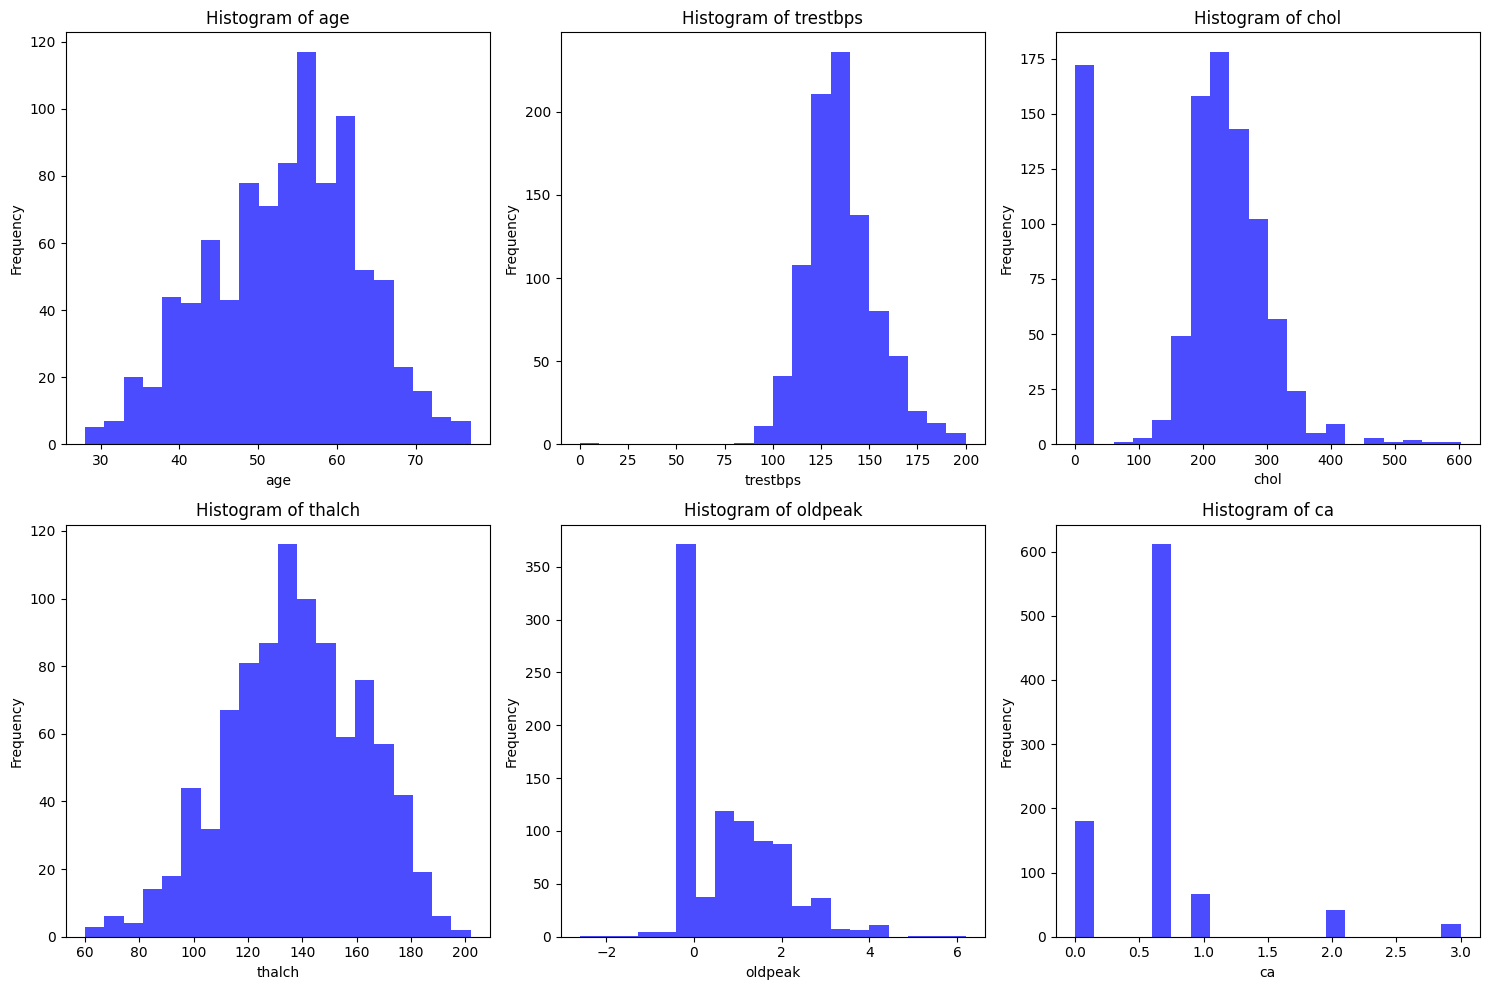

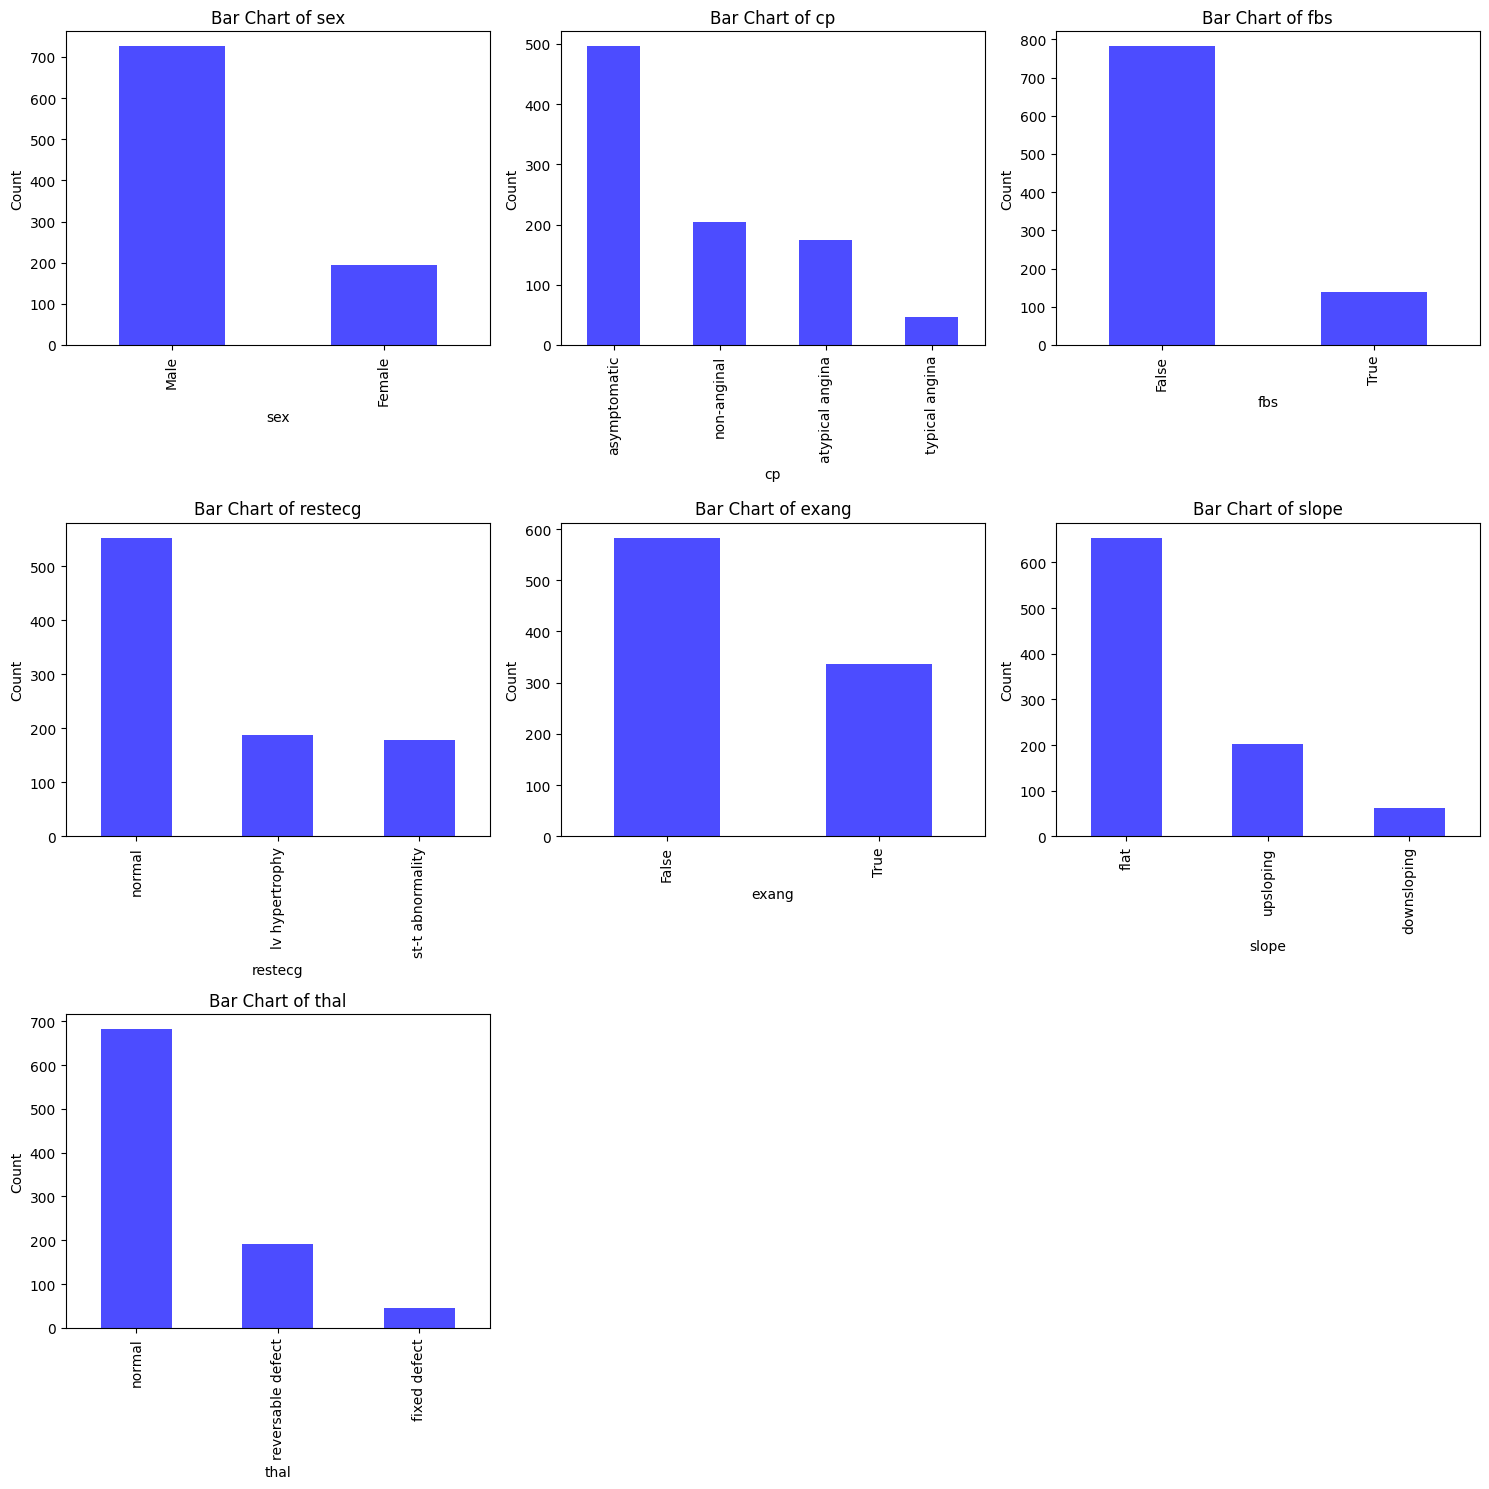

Number of outliers in age: 0


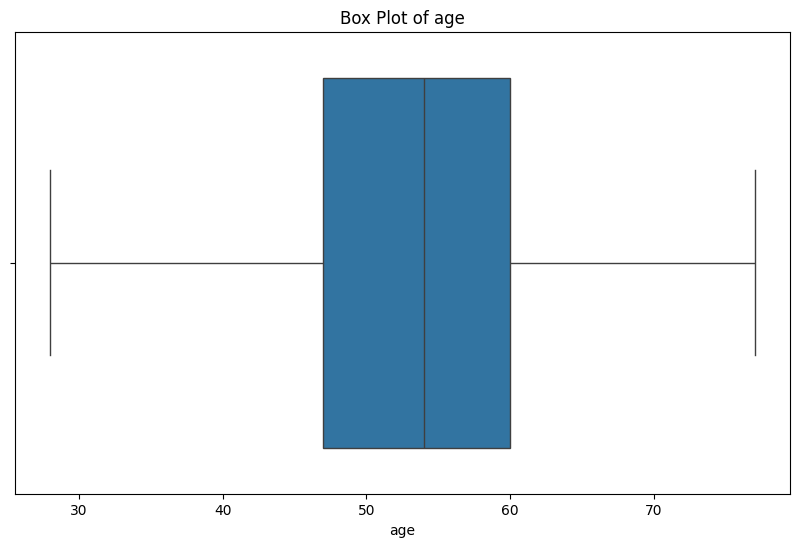

Number of outliers in trestbps: 28


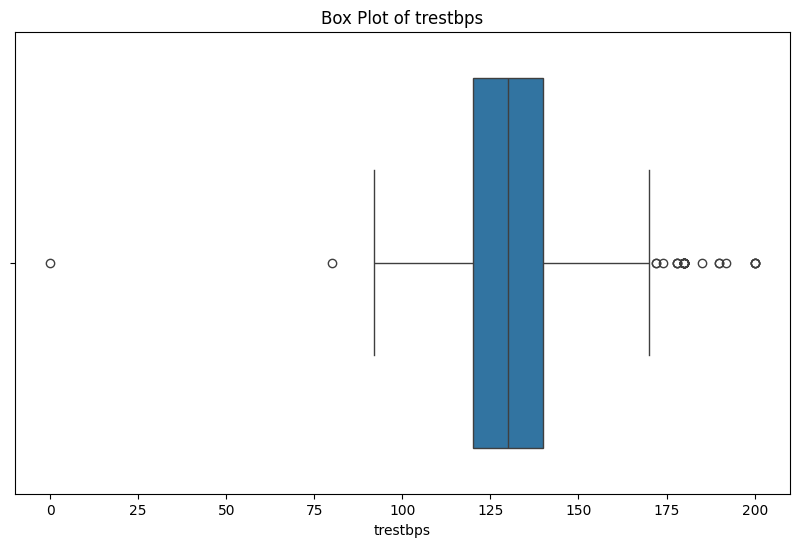

Number of outliers in chol: 185


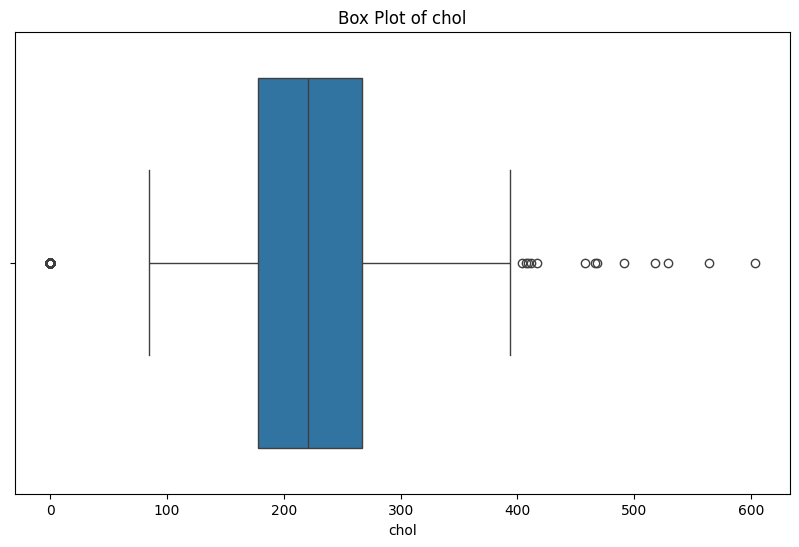

Number of outliers in thalch: 2


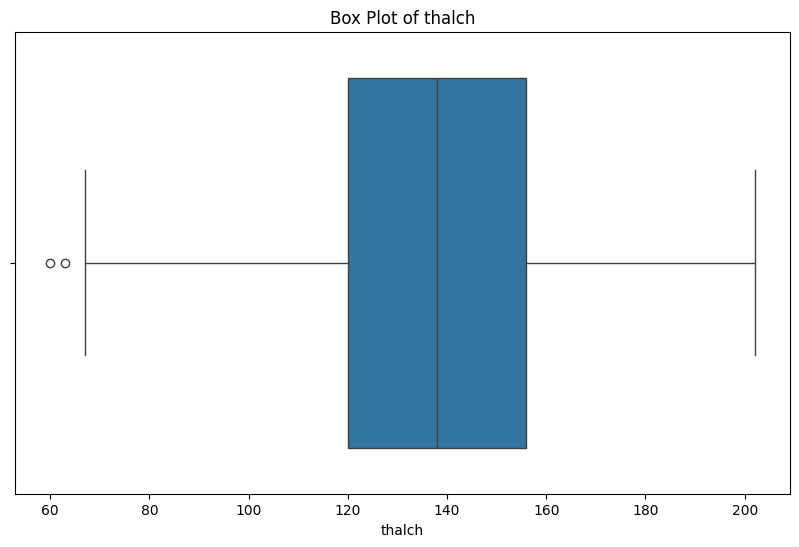

Number of outliers in oldpeak: 16


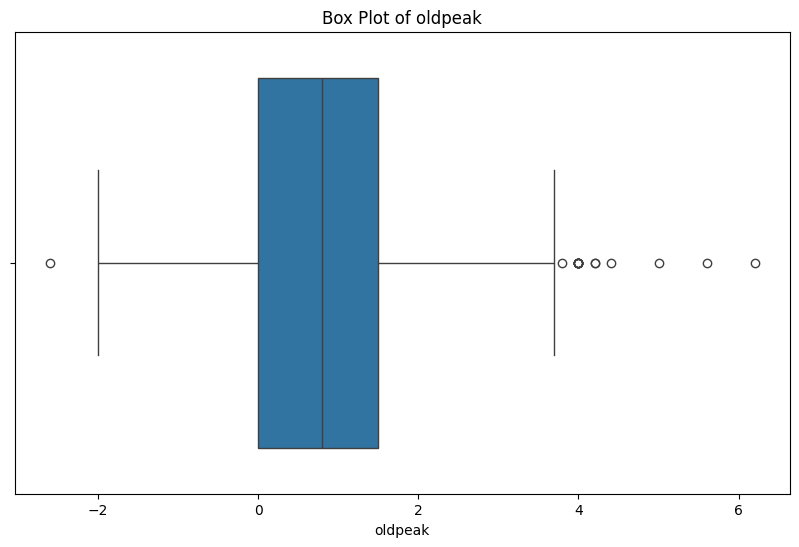

Number of outliers in ca: 309


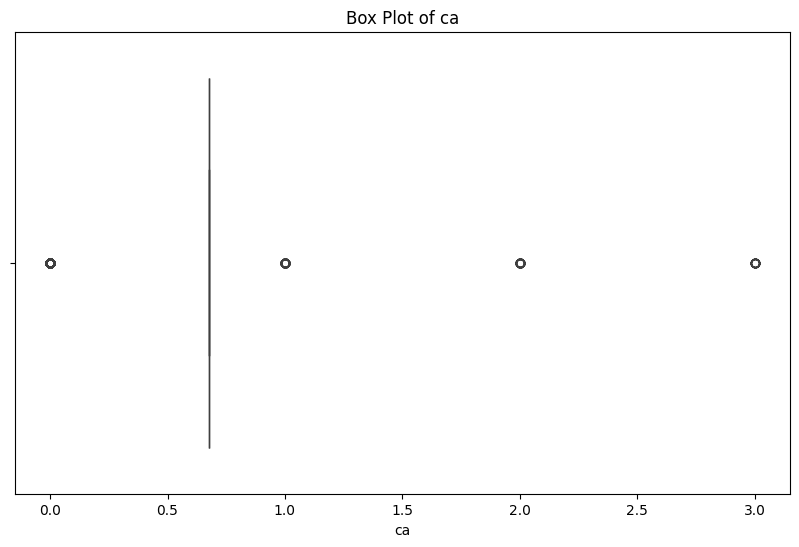

Data after preprocessing:
   age     sex    dataset               cp  trestbps   chol    fbs  \
0   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope        ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.676375   
1  lv hypertrophy   108.0   True      1.5         flat  0.676375   
2  lv hypertrophy   129.0   True      2.6         flat  0.676375   
3          normal   187.0  False      3.5  downsloping  0.676375   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.676375   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4   

In [92]:
##feature Engineering Process
#data preprocessing steps 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = r'C:\Users\DS\Downloads\heart_disease_uci.csv'
data = pd.read_csv(file_path)

# Step 1: Handle missing values
print("Missing values before handling:")
print(data.isnull().sum())

# Step 2: Separate features
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Fill missing values for numerical features
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())

# Fill missing values for categorical features
for feature in categorical_features:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

# Visualization
## Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Fixed 2x3 grid
    plt.hist(data[feature], bins=20, alpha=0.7, color='b')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

## Plot bar charts for categorical features
plt.figure(figsize=(15, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)  # Fixed 3x3 grid
    data[feature].value_counts().plot(kind='bar', alpha=0.7, color='b', ax=plt.gca())
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

# Outlier detection using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect and handle outliers
for feature in numerical_features:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data, feature)
    print(f'Number of outliers in {feature}: {len(outliers)}')
    
    # Box plot for outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

    # Handle outliers: replace them with the mean value
    data[feature] = data[feature].apply(lambda x: data[feature].mean() if x < lower_bound or x > upper_bound else x)

# Drop not useful columns
data = data.drop('id', axis=1, errors='ignore')  # Drop 'id' column if it exists, ignore if it does not

# Show data after preprocessing
print("Data after preprocessing:")
print(data.head())


Class Distribution:
thal
normal               682
reversable defect    192
fixed defect          46
Name: count, dtype: int64


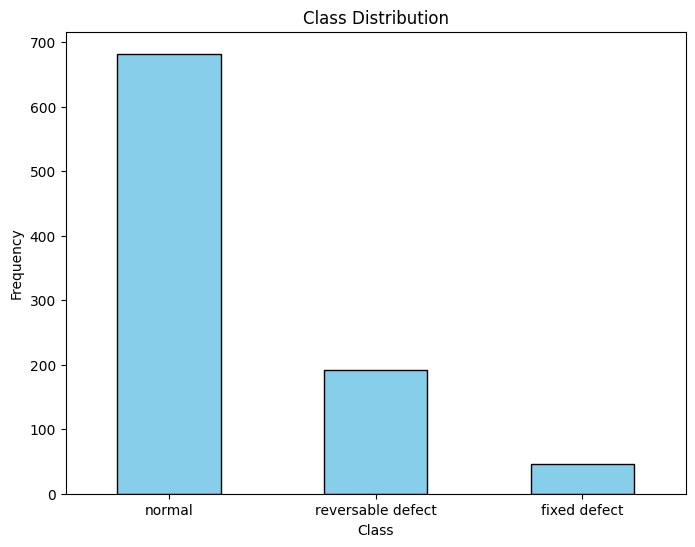

Class Proportions:
thal
normal               0.741304
reversable defect    0.208696
fixed defect         0.050000
Name: proportion, dtype: float64


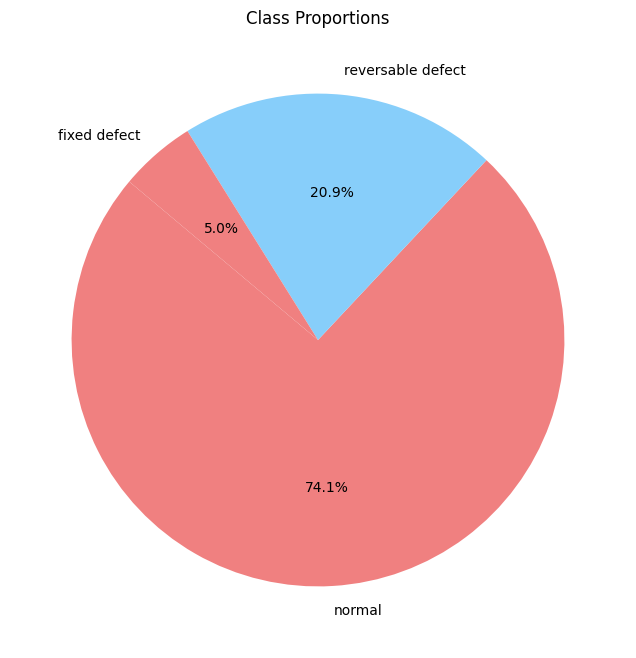

In [93]:
# Check class distribution
class_distribution = data['thal'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 6))
data['thal'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Check class proportions
class_proportions = data['thal'].value_counts(normalize=True)
print("Class Proportions:")
print(class_proportions)

# Plot class proportions as a pie chart
plt.figure(figsize=(8, 8))
data['thal'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)
plt.title('Class Proportions')
plt.ylabel('')
plt.show()


In [94]:
#Feature Transformation 

import numpy as np

# Ensure all values are positive before applying log transformation
# Replace zeros with a small positive number to avoid log(0)
data['oldpeak'] = np.where(data['oldpeak'] <= 0, 0.01, data['oldpeak']) 
data['oldpeak'] = np.log(data['oldpeak'] * 100 + 1)

# Fill NaN values with the mean
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].mean())

# Handle zeros for 'ca' and 'chol' before applying log transformation
data['ca'] = np.where(data['ca'] <= 0, 0.01, data['ca']) 
data['ca'] = np.log(data['ca'] * 100 + 1)

data['chol'] = np.where(data['chol'] <= 0, 0.01, data['chol']) 
data['chol'] = np.log(data['chol'] * 100 + 1)

# Print the transformed data
print(data[['oldpeak', 'ca', 'chol']].head())


    oldpeak       ca       chol
0  5.442418  4.22884  10.056252
1  5.017280  4.22884  10.261197
2  5.564520  4.22884  10.038936
3  5.860786  4.22884  10.126671
4  4.948760  4.22884   9.923339


In [95]:
# Generate new features
data['age_cholesterol'] = data['age'] * data['chol']
data['trestbps_sqrt'] = data['trestbps'] ** 2

data['cholesterol_blood_pressure_avg'] = (data['chol'] + data['trestbps']) / 2

print(data.head())

   age     sex    dataset               cp  trestbps       chol    fbs  \
0   63    Male  Cleveland   typical angina     145.0  10.056252   True   
1   67    Male  Cleveland     asymptomatic     160.0  10.261197  False   
2   67    Male  Cleveland     asymptomatic     120.0  10.038936  False   
3   37    Male  Cleveland      non-anginal     130.0  10.126671  False   
4   41  Female  Cleveland  atypical angina     130.0   9.923339  False   

          restecg  thalch  exang   oldpeak        slope       ca  \
0  lv hypertrophy   150.0  False  5.442418  downsloping  4.22884   
1  lv hypertrophy   108.0   True  5.017280         flat  4.22884   
2  lv hypertrophy   129.0   True  5.564520         flat  4.22884   
3          normal   187.0  False  5.860786  downsloping  4.22884   
4  lv hypertrophy   172.0  False  4.948760    upsloping  4.22884   

                thal  num  age_cholesterol  trestbps_sqrt  \
0       fixed defect    0       633.543848        21025.0   
1             normal    

In [96]:
## encode categorical 

categorical_columns = ['age', 'sex','dataset','cp','fbs','restecg','exang','slope','thal']  # Add other categorical columns as needed
for column in categorical_columns:
    data[column] = LabelEncoder().fit_transform(data[column])

data.head(10)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_cholesterol,trestbps_sqrt,cholesterol_blood_pressure_avg
0,35,1,0,3,145.0,10.056252,1,0,150.0,0,5.442418,0,4.22884,0,0,633.543848,21025.0,77.528126
1,39,1,0,0,160.0,10.261197,0,0,108.0,1,5.017280,1,4.22884,1,2,687.500196,25600.0,85.130598
2,39,1,0,0,120.0,10.038936,0,0,129.0,1,5.564520,1,4.22884,2,1,672.608702,14400.0,65.019468
3,9,1,0,2,130.0,10.126671,0,1,187.0,0,5.860786,0,4.22884,1,0,374.686831,16900.0,70.063336
4,13,0,0,1,130.0,9.923339,0,0,172.0,0,4.948760,2,4.22884,1,0,406.856907,16900.0,69.961670
5,28,1,0,1,120.0,10.069044,0,1,178.0,0,4.394449,2,4.22884,1,0,563.866484,14400.0,65.034522
6,34,0,0,0,140.0,10.196194,0,0,160.0,0,5.888878,0,4.22884,1,3,632.164058,19600.0,75.098097
7,29,0,0,0,120.0,10.474495,0,1,163.0,1,4.110874,2,4.22884,1,0,597.046235,14400.0,65.237248
8,35,1,0,0,130.0,10.142544,0,0,147.0,0,4.948760,1,4.22884,2,2,638.980261,16900.0,70.071272
9,25,1,0,0,140.0,9.918425,1,0,155.0,1,5.739793,0,4.22884,2,1,525.676548,19600.0,74.959213


In [97]:
## after feature engineering check performence of model

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, 
    classification_report
)

# Prepare data
X = data.drop('thal', axis=1)
y = data['thal']

# Check distribution of classes
print("Class distribution in target variable:\n", y.value_counts())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)
# Compute AUC for multi-class
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Detailed classification report
print(classification_report(y_test, y_pred, zero_division=1))


Class distribution in target variable:
 thal
1    682
2    192
0     46
Name: count, dtype: int64
Accuracy: 0.7663043478260869
Precision: 0.8198653198653197
Recall: 0.43427704752275026
F1 Score: 0.43571861734384476
ROC AUC: 0.6876141397098007
Confusion Matrix:
[[  0   5   4]
 [  0 126   3]
 [  0  31  15]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         9
           1       0.78      0.98      0.87       129
           2       0.68      0.33      0.44        46

    accuracy                           0.77       184
   macro avg       0.82      0.43      0.44       184
weighted avg       0.76      0.77      0.72       184



In [181]:
#GridSearchCV hyperparameter 

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

# Example: Load your data
# data = pd.read_csv('heart_disease.csv')

# Check class balance
print("Target variable distribution:\n", data['thal'].value_counts())

# Feature Engineering
data['oldpeak'] = np.log(data['oldpeak'] * 100 + 1)
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].mean())

data['ca'] = np.log(data['ca'] * 100 + 1)
data['chol'] = np.log(data['chol'] * 100 + 1)

# Feature Generation
data['age_cholesterol'] = data['age'] * data['chol']
data['trestbps_sqrt'] = data['trestbps'] ** 2
data['cholesterol_blood_pressure_avg'] = (data['chol'] + data['trestbps']) / 2

# Encode categorical columns
categorical_columns = ['age', 'sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for column in categorical_columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# Prepare data
X = data.drop('thal', axis=1)
y = data['thal']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}


# Initialize GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
y_pred_prob = best_model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {auc}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(classification_report(y_test, y_pred, zero_division=1))


Target variable distribution:
 thal
1    682
2    192
0     46
Name: count, dtype: int64
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.785337378194521
Accuracy: 0.7934782608695652
Precision: 0.8301533857089413
Recall: 0.44928355957767724
F1 Score: 0.4569993031870026
ROC AUC: 0.7215202528108208
Confusion Matrix:
[[  0   7   2]
 [  0 131   5]
 [  0  24  15]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         9
           1       0.81      0.96      0.88       136
           2       0.68      0.38      0.49        39

    accuracy                           0.79       184
   macro avg       0.83      0.45      0.46       184
weighted avg       0.79      0.79      0.75       184



C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DS\AppData\Local\Pr

In [183]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

# Example: Load your data
# data = pd.read_csv('heart_disease.csv')

# Check class balance
print("Target variable distribution:\n", data['thal'].value_counts())

# Encode categorical columns
categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for column in categorical_columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# Prepare data
X = data.drop('thal', axis=1)
y = data['thal']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear']  # Optimization algorithms
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
y_pred_prob = best_model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {auc}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(classification_report(y_test, y_pred, zero_division=1))


Target variable distribution:
 thal
1    682
2    192
0     46
Name: count, dtype: int64
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.7812465526751241
Accuracy: 0.7934782608695652
Precision: 0.8234339500162284
Recall: 0.46147561588738056
F1 Score: 0.46687598116169543
ROC AUC: 0.7077403193446551
Confusion Matrix:
[[  0   7   2]
 [  0 129   7]
 [  0  22  17]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         9
           1       0.82      0.95      0.88       136
           2       0.65      0.44      0.52        39

    accuracy                           0.79       184
   macro avg       0.82      0.46      0.47       184
weighted avg       0.79      0.79      0.76       184



In [135]:
#polynomial feature 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, 
    classification_report
)
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = r'C:\Users\DS\Downloads\heart_disease_uci.csv'
data = pd.read_csv(file_path)

# Handle missing values
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_features = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Fill missing values for numerical features
numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_features] = numerical_imputer.fit_transform(data[numerical_features])

# Fill missing values for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

# Check for any remaining NaN values
print("Missing values after imputation:\n", data.isna().sum())

# Encode categorical columns
for column in categorical_features:
    data[column] = LabelEncoder().fit_transform(data[column])

# Encode target variable
le = LabelEncoder()
data['thal'] = le.fit_transform(data['thal'])

# Check target variable class distribution
print("Target variable class distribution:\n", data['thal'].value_counts())

# Feature Engineering
# Handle negative values for sqrt transformation

# Print initial values to identify any negatives
print("Initial 'oldpeak' values:\n", data['oldpeak'].describe())

# Identify negative values in the 'oldpeak' column
negative_oldpeak = data['oldpeak'] < 0
print(f"Number of negative values in 'oldpeak': {negative_oldpeak.sum()}")

# Replace negative values with zero or another appropriate value
data['oldpeak'] = data['oldpeak'].apply(lambda x: 0 if x < 0 else x)

# Print the values after replacing negatives
print("Adjusted 'oldpeak' values:\n", data['oldpeak'].describe())

# Ensure non-negative values for square root transformation
data['ca'] = data['ca'].clip(lower=0)
data['chol'] = data['chol'].clip(lower=0)

# Apply square root transformation safely
data['oldpeak'] = np.sqrt(data['oldpeak'])
data['ca'] = np.sqrt(data['ca'])
data['chol'] = np.sqrt(data['chol'])

# Print transformed values to verify
print("Transformed 'oldpeak' values:\n", data['oldpeak'].describe())
print("Transformed 'ca' values:\n", data['ca'].describe())
print("Transformed 'chol' values:\n", data['chol'].describe())

# Create new features
data['age_cholesterol'] = data['age'] * data['chol']
data['trestbps_sqrt'] = data['trestbps'] ** 2
data['cholesterol_blood_pressure_avg'] = (data['chol'] + data['trestbps']) / 2

# Prepare data
X = data.drop('thal', axis=1)
y = data['thal']

# Check for any remaining NaN values in features
print("Missing values in features before scaling:\n", X.isna().sum())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Check for any remaining NaN values after polynomial features transformation
print("Missing values in features after polynomial transformation:\n", pd.DataFrame(X_poly).isna().sum())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)
# Compute AUC for multi-class
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Detailed classification report
print(classification_report(y_test, y_pred, zero_division=1))


Missing values after imputation:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
Target variable class distribution:
 thal
1    682
2    192
0     46
Name: count, dtype: int64
Initial 'oldpeak' values:
 count    920.000000
mean       0.878788
std        1.053774
min       -2.600000
25%        0.000000
50%        0.800000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64
Number of negative values in 'oldpeak': 12
Adjusted 'oldpeak' values:
 count    920.000000
mean       0.892592
std        1.032301
min        0.000000
25%        0.000000
50%        0.800000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64
Transformed 'oldpeak' values:
 count    920.000000
mean       0.689364
std        0.646393
min        0.000000
25%        0.000000
50%        0.894427
75%  

In [184]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = r'C:\Users\DS\Downloads\heart_disease_uci.csv'
dataframe = pd.read_csv(file_path)
pd.set_option('future.no_silent_downcasting', True)
# Cleaning and handling missing values (as previously defined)
def cleaningData(df, drop_columns=None):
    # Check for duplicates
    duplicate = df.duplicated().sum()
    if duplicate > 0:
        df = df.drop_duplicates()

    if drop_columns:
        df = df.drop(columns=[col for col in drop_columns if col in df.columns], axis=1)

    return df

def handleMissingValues(df, strategy='mean', columns=None):
    if df.isnull().values.any():
        if strategy == 'mean':
            numeric_cols = df.select_dtypes(include='number').columns
            df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
        
        elif strategy == 'mode':
            if columns is None:
                categorical_cols = df.select_dtypes(include='object').columns
            else:
                categorical_cols = columns
            for col in categorical_cols:
                mode_value = df[col].mode()[0]
                df[col] = df[col].fillna(mode_value)
            df[categorical_cols] = df[categorical_cols].infer_objects(copy=False)
    
    return df

# Apply data cleaning
columns = ['id']
dataframe = cleaningData(dataframe, drop_columns=columns)
categorical_features = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
dataframe = handleMissingValues(dataframe, strategy='mean', columns=None)
dataframe = handleMissingValues(dataframe, strategy='mode', columns=categorical_features)

# Replace negative values in 'oldpeak'
if 'oldpeak' in dataframe.columns:
    dataframe['oldpeak'] = dataframe['oldpeak'].apply(lambda x: 0 if x < 0 else x)

# Encode categorical columns
categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for column in categorical_columns:
    dataframe[column] = LabelEncoder().fit_transform(dataframe[column])

# Prepare features and target
X = dataframe.drop(columns='thal')
y = dataframe['thal']

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model= LogisticRegression(max_iter=2000)
# Function to evaluate model
def evaluate_model(X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return accuracy, conf_matrix, class_report
# Apply filter method: Chi-Square on categorical features
select_k_best = SelectKBest(chi2, k=10)
X_train_chi = select_k_best.fit_transform(X_train, y_train)
X_test_chi = select_k_best.transform(X_test)

# Standardize the features after feature selection
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_chi)
X_test_scaled = scaler.transform(X_test_chi)
features_no = select_k_best.get_support()

# original feature names 
original_feature_names = X_train.columns
# names of the selected features
selected_feature_names = original_feature_names[features_no]
print("Number of original features:", X_train.shape[1])
print("Number of reduced features:", X_test_chi.shape[1])
print("Names of selected  features:")
for feature in selected_feature_names:
    print(feature)
# Evaluate model with Chi-Square selected features
print("\nModel Performance with Chi-Square Selected Features:")
chi_accuracy, chi_conf_matrix, chi_class_report = evaluate_model(X_train_chi, X_test_chi, y_train, y_test)
print(f"Accuracy: {chi_accuracy}")
print("Confusion Matrix:")
print(chi_conf_matrix)
print("Classification Report:")
print(chi_class_report)
rfe = RFE(estimator=model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)
# Evaluate model with RFE selected features
print("\nModel Performance with RFE Selected Features:")
rfe_accuracy, rfe_conf_matrix, rfe_class_report = evaluate_model(X_train_rfe, X_test_rfe, y_train, y_test)
print(f"Accuracy: {rfe_accuracy}")
print("Confusion Matrix:")
print(rfe_conf_matrix)
print("Classification Report:")
print(rfe_class_report)
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
importances = rf.feature_importances_
indices = importances.argsort()[-10:]  # Select top 10 features

X_train_embedded = X_train_scaled[:, indices]
X_test_embedded = X_test_scaled[:, indices]

# Evaluate model with embedded method selected features
print("\nModel Performance with Embedded Method Selected Features:")
embed_accuracy, embed_conf_matrix, embed_class_report = evaluate_model(X_train_embedded, X_test_embedded, y_train, y_test)
print(f"Accuracy: {embed_accuracy}")
print("Confusion Matrix:")
print(embed_conf_matrix)
print("Classification Report:")
print(embed_class_report)


Number of original features: 14
Number of reduced features: 10
Names of selected  features:
age
dataset
cp
trestbps
chol
restecg
thalch
exang
oldpeak
num

Model Performance with Chi-Square Selected Features:


C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: U

Accuracy: 0.782608695652174
Confusion Matrix:
[[  0   6   3]
 [  0 125   4]
 [  0  27  19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.79      0.97      0.87       129
           2       0.73      0.41      0.53        46

    accuracy                           0.78       184
   macro avg       0.51      0.46      0.47       184
weighted avg       0.74      0.78      0.74       184


Model Performance with RFE Selected Features:
Accuracy: 0.782608695652174
Confusion Matrix:
[[  0   6   3]
 [  0 125   4]
 [  0  27  19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.79      0.97      0.87       129
           2       0.73      0.41      0.53        46

    accuracy                           0.78       184
   macro avg       0.51      0.46      0.47       184
weighted avg    

C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [172]:
print("\nComparison of Model Performance:")
print(f"Chi-Square Selected Features Model Accuracy: {chi_accuracy}")
print(f"Wrapper Selected Features Model Accuracy: {rfe_accuracy}")
print(f"Embedded Method Selected Features Model Accuracy: {embed_accuracy}")


Comparison of Model Performance:
Chi-Square Selected Features Model Accuracy: 0.7934782608695652
Wrapper Selected Features Model Accuracy: 0.782608695652174
Embedded Method Selected Features Model Accuracy: 0.782608695652174
